Load the `ISLR2` and `tidyverse` packages.

In [14]:
library('ISLR2')
library('tidymodels')

`glimpse` the `Auto` dataset (this comes from the `ISLR2` package).

In [15]:
data(Auto)
glimpse(Auto)

Rows: 392
Columns: 9
$ mpg          <dbl> 18, 15, 18, 16, 17, 15, 14, 14, 14, 15, 15, 14, 15, 14, 2…
$ cylinders    <int> 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 4, 6, 6, 6, 4, …
$ displacement <dbl> 307, 350, 318, 304, 302, 429, 454, 440, 455, 390, 383, 34…
$ horsepower   <int> 130, 165, 150, 150, 140, 198, 220, 215, 225, 190, 170, 16…
$ weight       <int> 3504, 3693, 3436, 3433, 3449, 4341, 4354, 4312, 4425, 385…
$ acceleration <dbl> 12.0, 11.5, 11.0, 12.0, 10.5, 10.0, 9.0, 8.5, 10.0, 8.5, …
$ year         <int> 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 70, 7…
$ origin       <int> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, …
$ name         <fct> chevrolet chevelle malibu, buick skylark 320, plymouth sa…


Plot `mpg`  as a function of `displacement`.

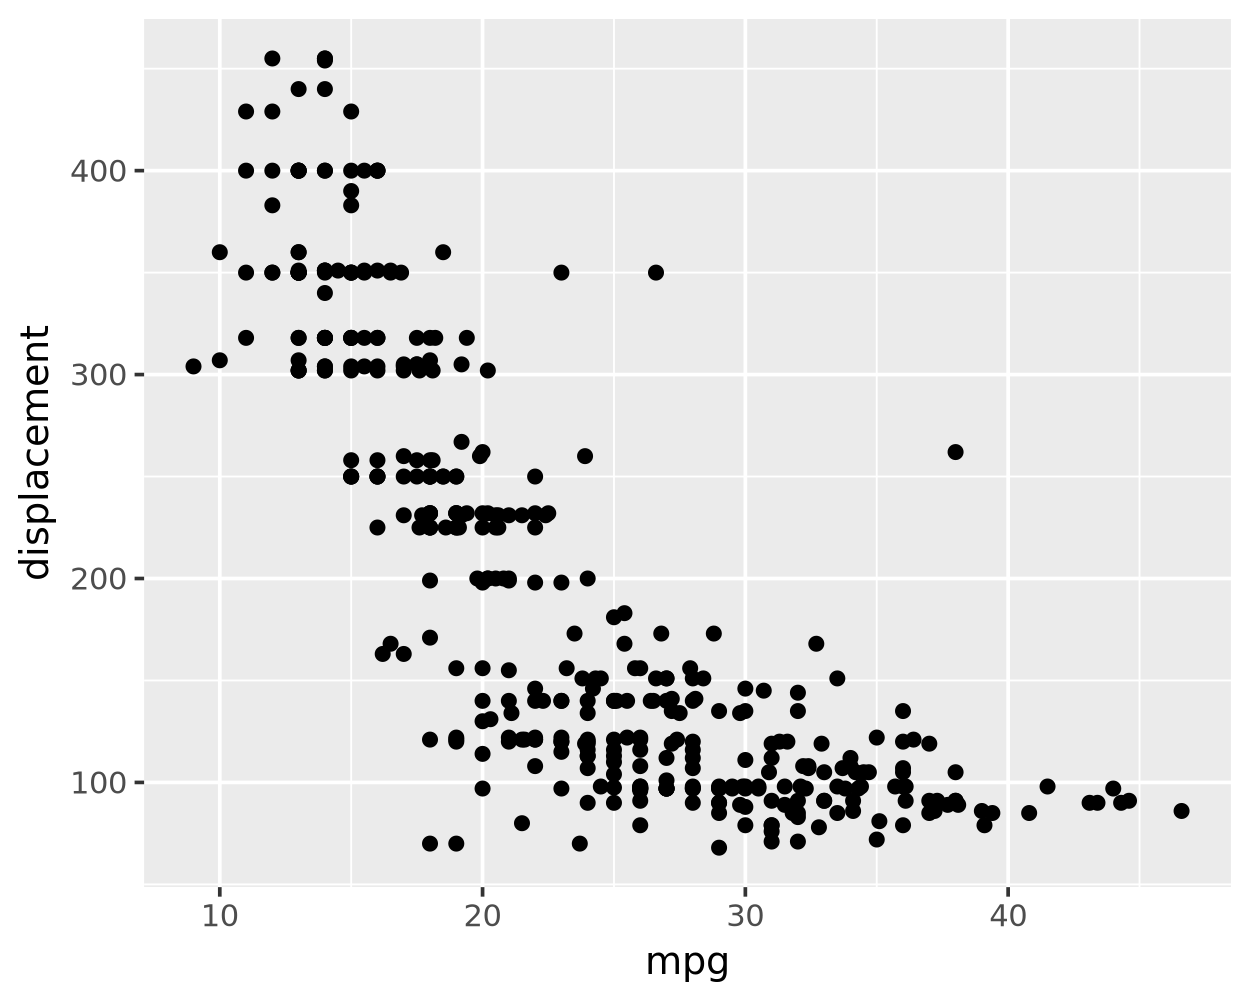

In [16]:
ggplot(data = Auto, aes(x = mpg, y = displacement)) +
    geom_point()

❓Does the relationship of `mpg` to `displacement` look linear?

This realtionship doesn't look linear. It appears to have a curve to it. (It looks more like a 1/x graph where x > 0.)



Model `mpg` as a function of `displacement` and `cylinders`. 

- Transform the `displacement` variable using a `spline` or `polynomial` transform. (Hint: use `step_ns` or `step_poly`).
- Combine `step_mutate(cyl_cat = factor(cylinders))` followed by `step_dummy(cyl_cat)` and `step_rm(cylinders)` to convert `cylinders` to categorical data for the model.

Assuming you name your fitted model `mod_fit` the code below can be used to visualize your model:

```r
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)
```

**Create and visualize your model below...**

In [44]:
rec = recipe(mpg ~ displacement + cylinders, data = Auto) |>
    step_poly(displacement, degree = 2, options = list(raw = TRUE)) |>
    step_mutate(cyl_cat = factor(cylinders)) |>
    step_dummy(cyl_cat) |>
    step_rm(cylinders) #|>
    #prep()



In [45]:
mod = linear_reg() |> set_engine('lm')

In [46]:
wf = workflow() |>
    add_recipe(rec) |>
    add_model(mod)

mod_fit = fit(wf, data = Auto)

In [48]:
#Not sure why this isnt working. 

In [50]:
predict(mod_fit, rec |> juice()) |>
    bind_cols(Auto) |>
ggplot(aes(x = displacement, y = mpg)) +
    geom_point(size = 1, alpha = 0.35) +
    geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1)

ERROR: [1m[33mError[39m in `validate_column_names()`:[22m
[33m![39m The following required columns are missing: 'displacement', 'cylinders'.


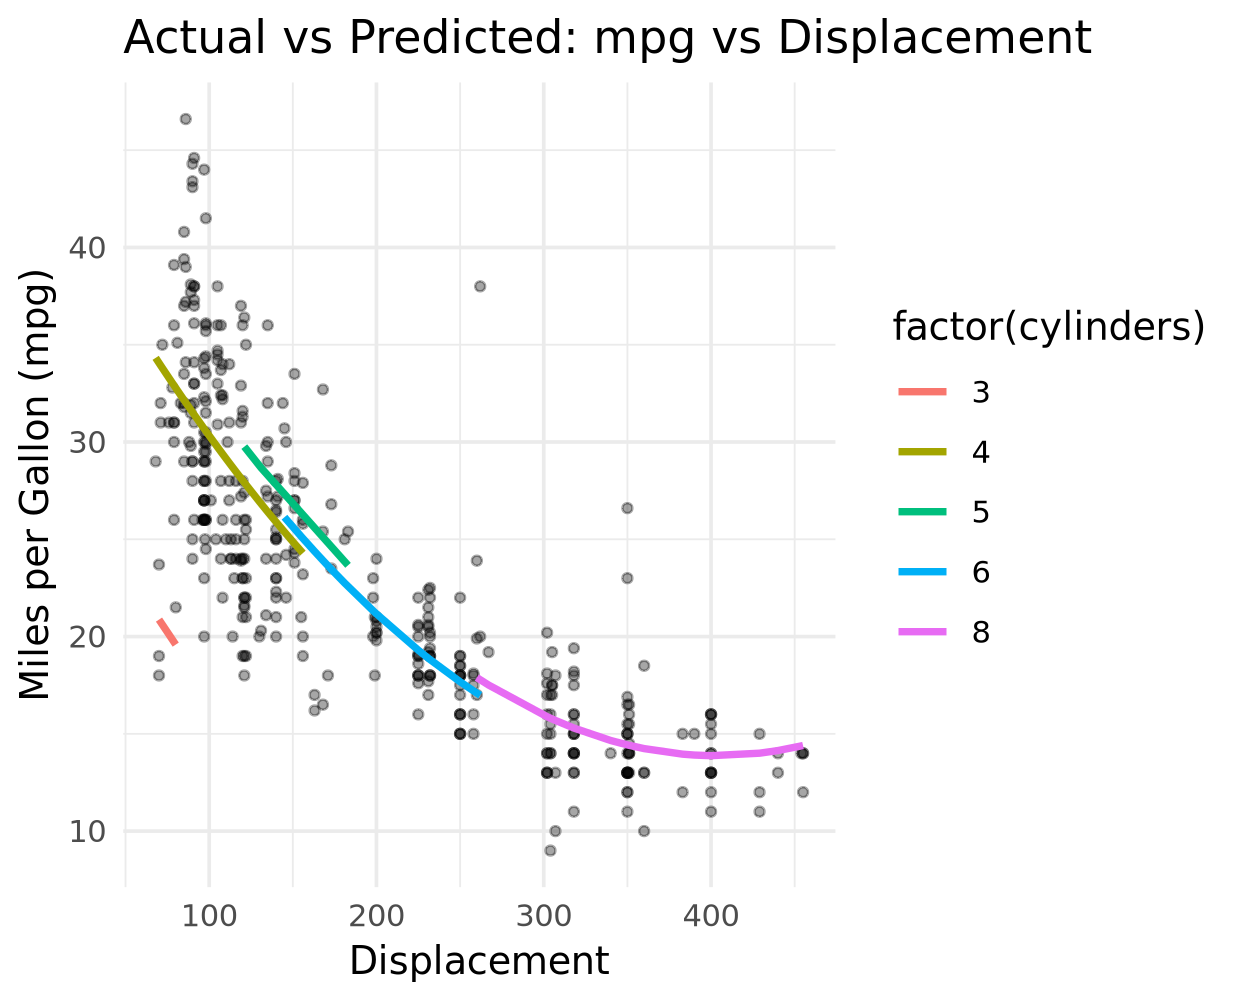

In [32]:
# Use the fitted workflow model to make predictions on the Auto dataset
predictions <- predict(mod_fit, new_data = Auto)

# Combine the predictions with the original data
result <- bind_cols(Auto, .pred = predictions$.pred)

# Create the plot
ggplot(result, aes(x = displacement, y = mpg)) +
  geom_point(size = 1, alpha = 0.35) +
  geom_line(aes(y = .pred, color = factor(cylinders)), linewidth = 1) +
  theme_minimal() +
  labs(title = "Actual vs Predicted: mpg vs Displacement",
       x = "Displacement", y = "Miles per Gallon (mpg)")

I was having some issues with the code that was given to us. Not really sure what was happening. I recently have had some issues with recipe() as well as when to use prep().

For example, in the week 12 example they had prep() at the end of the work I did to get the rec but when I tried that when I ran the wf code it said that I cant used pre_processed data. 

I did use chatGPT to help make the visualization. Not sure if that is correct or what you were looking for. Also just want to be upfront about using that to help me get the visualization and am not sure if I need to be deducted points because I used that. I just couldn't get the code to work that was given to me. 

I will try to be at office hours on wednesday to ask about the prep() question. 